# SOMENTE O ITEM 1 É OBRIGATÓRIO PARA APRESENTAÇÃO!

# História das Olimpíadas - Parte 2
_(créditos ao prof. Rafael Moreira)_

Você recentemente trabalhou (ou está trabalhando) em uma análise de dados históricos dos jogos olímpicos utilizando o Pandas para auxiliá-lo.

Desde que você iniciou seus trabalhos nesse projeto, novas ferramentas bastante poderosas foram ensinadas! O seu papel agora será utilizar essas novas ferramentas para gerar algumas visualizações que tornarão certas informações muito mais claras.

Utilize qualquer uma das bibliotecas estudadas (```matplotlib```, ```seaborn``` e ```plotly```) para realizar as atividades propostas. Não há problema em usar apenas uma para realizar todas as atividades, nem em utilizar cada uma delas em uma atividade diferente - siga suas preferências pessoais!

Utilize os (muitos) parâmetros permitidos por cada função e/ou atributos dos objetos fornecidos pelas bibliotecas para criar uma identidade visual coesa para ser utilizada em todo o projeto. Use títulos, legendas e rótulos nos eixos para deixar os gráficos verdadeiramente informativos. E não se esqueça que a simples escolha das cores a serem utilizadas pode tornar os gráficos ainda mais interessantes!

Você utilizará o mesmo dataset fornecido no projeto anterior. Não há problemas em reaproveitar códigos do projeto anterior para economizar tempo e focar seus esforços na geração dos gráficos.

Para começar, importe o Pandas e carregue o arquivo ```athlete_events.csv``` fornecido no projeto anterior.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_athlete_events = pd.read_csv('./athlete_events.csv') # Leitura do arquivo

## 1. O Brasil nas Olimpíadas

Vamos começar filtrando novamente os dados que iremos trabalhar. Crie um DataFrame contendo apenas informações sobre atletas **medalhistas** brasileiros.

In [91]:
df_athlete_brazil = df_athlete_events[df_athlete_events['NOC']=='BRA'].reset_index()# Filtrando apenas os atletas brasileiros
df_athlete_brazil_medal = df_athlete_brazil.dropna(subset=['Medal']) # Dropa os NA's da coluna 'Medal'
df_athlete_brazil_medal.head(2)


,index,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
8,1651,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver
9,1652,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver


Vamos caracterizar fisicamente nossos medalhistas, verificando se há alguma correlação entre o desempenho em certos esportes e o tipo físico dos atletas. 

Gere um gráfico de barras contendo os diferentes esportes no eixo X e a altura dos atletas no eixo Y. Utilize barras lado-a-lado para separar atletas do sexo masculino e feminino.

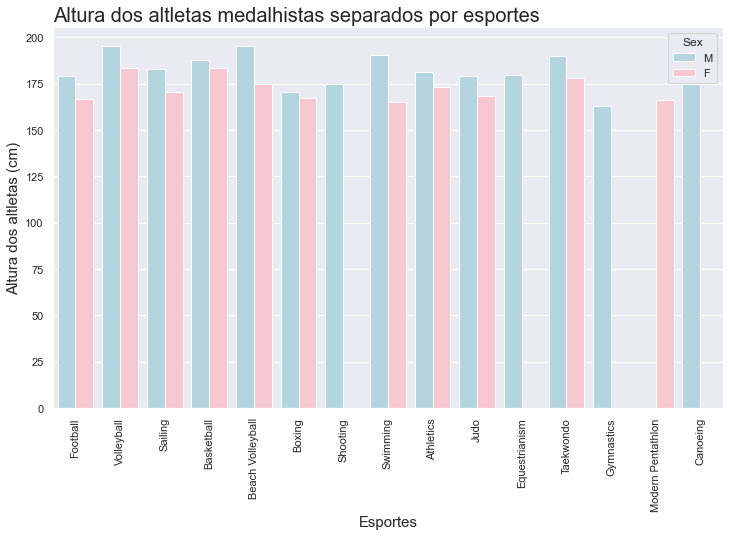

In [109]:
# Criando o gráfico de barras com o seaborn: Altura dos atletas x esporte.
plt.figure(figsize=(12,7))# Ajustando o tamanho do gráfico
sns.set_theme
sns.barplot(data=df_athlete_brazil_medal, x='Sport', y='Height', hue='Sex', palette=['lightblue', 'pink'], ci=None) #Utilizando o dataframe df_athlete_brazil_medal contendo apenas os atletas medalhista brasileiros
plt.xticks(rotation=90);# Rotacionando as informações do eixo x para facilitar a leitura
plt.title('Altura dos altletas medalhistas separados por esportes', size=20, loc='left')# Definindo o título do gráfico
plt.ylabel('Altura dos altletas (cm)',size=15)# Definindo a nomenclatura do eixo y e tamanho das letras
plt.xlabel('Esportes',size=15);# Definindo a nomenclatura do eixo x e tamanho das letras

Agora gere um gráfico semelhante ilustrando o peso dos atletas.

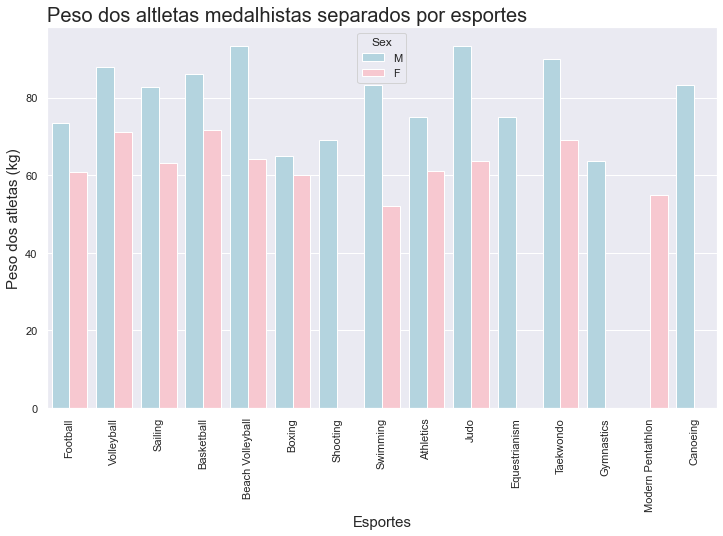

In [110]:
# Criando o gráfico de barras com o seaborn: Peso dos atletas x esporte.
plt.figure(figsize=(12,7))
sns.barplot(data=df_athlete_brazil_medal, x='Sport', y='Weight', hue='Sex', palette=['lightblue', 'pink'], ci=None)
plt.xticks(rotation=90);
plt.title('Peso dos altletas medalhistas separados por esportes', size=20, loc='left')
plt.ylabel('Peso dos atletas (kg)',size=15)
plt.xlabel('Esportes',size=15);

Vamos analisar agora as medalhas que nossos atletas trouxeram para casa.

Encontre os maiores medalhistas brasileiros em **total de medalhas**. Em seguida, faça um gráfico de barras empilhadas. No eixo X coloque o nome dos atletas, e no eixo Y coloque o número de medalhas. Utilize as barras empilhadas para mostrar, respectivamente, as medalhas de bronze, prata e ouro de cada atleta.

In [ ]:
## Para criar um gráfico de barras empilhadas, eu criei 3 dataframes: 

# - O primeiro com o total de medalhas;
# - Segundo com a soma de medalhas de pratas e bronze;
# - O terceiro com as medalhas de bronze;
# - Na construção do gráfico eu sobrepus os 3 dataframes;

# Segue abaixo a construção do mesmo:

In [95]:
#Filtros para saber quem são os top 3 medalhistas brasileiros
#Eu utilizei esse dataframe na construção do gráfico com a informação do total de medalhas 
df_athletes_brazil_medal_greatest = df_athlete_brazil_medal.groupby(['Name', 'Medal'])['Medal'].count().to_frame(name='Quantidade').reset_index()
df_athletes_brazil_medal_greatest = df_athletes_brazil_medal_greatest.groupby('Name')[['Quantidade']].sum()
df_athletes_brazil_medal_greatest = df_athletes_brazil_medal_greatest.sort_values(by='Quantidade' , ascending=False).head(3)
df_athletes_brazil_medal_greatest.reset_index(inplace=True)
df_athletes_brazil_medal_greatest.sort_values(by='Name', inplace=True)#Tive que ordenar novamente, devido a necessidade de todos os dataframes que vão compor o gráfico, precisarem estar na mesma ordem.
df_athletes_brazil_medal_greatest

,Name,Quantidade
2,Gustavo Frana Borges,4
0,Robert Scheidt,5
1,Torben Schmidt Grael,5


In [96]:
# Criando um data frame com apenas as informações do top 3 medalhistas, ilustrando a quantidade da cada medalha.
#Isso facilitou a construção do gráfico de barras sobre postas.
df_athlete_brazil_robert = df_athlete_brazil_medal[df_athlete_brazil_medal.Name == 'Robert Scheidt']
df_athlete_brazil_torben = df_athlete_brazil_medal[df_athlete_brazil_medal.Name == 'Torben Schmidt Grael']
df_athlete_brazil_gustavo = df_athlete_brazil_medal[df_athlete_brazil_medal.Name == 'Gustavo Frana Borges']
df_top3_athlete_brazil_medal = pd.concat([df_athlete_brazil_robert, df_athlete_brazil_torben, df_athlete_brazil_gustavo])
df_top3_athlete_brazil_medal.reset_index(inplace=True)
df_top3_athlete_brazil_medal = df_top3_athlete_brazil_medal.groupby(['Name','Medal'])['Medal'].count().to_frame(name='Quantidade')
df_top3_athlete_brazil_medal.reset_index(inplace=True)
df_top3_athlete_brazil_medal


,Name,Medal,Quantidade
0,Gustavo Frana Borges,Bronze,2
1,Gustavo Frana Borges,Silver,2
2,Robert Scheidt,Bronze,1
3,Robert Scheidt,Gold,2
4,Robert Scheidt,Silver,2
5,Torben Schmidt Grael,Bronze,2
6,Torben Schmidt Grael,Gold,2
7,Torben Schmidt Grael,Silver,1


In [97]:
# Criando o dataframe com a quantidade total de prata e bronze
df_greatest_athlete_brazil_only_silver_bronze = df_top3_athlete_brazil_medal[df_top3_athlete_brazil_medal.Medal != 'Gold']
df_greatest_athlete_brazil_only_silver_bronze = df_greatest_athlete_brazil_only_silver_bronze.groupby('Name')['Quantidade'].sum().to_frame(name='Quantidade')
df_greatest_athlete_brazil_only_silver_bronze.reset_index(inplace=True)
df_greatest_athlete_brazil_only_silver_bronze.sort_values(by='Name')

,Name,Quantidade
0,Gustavo Frana Borges,4
1,Robert Scheidt,3
2,Torben Schmidt Grael,3


In [98]:
# Criando o dataframe com a quantidade total de bronze
df_greatest_athlete_brazil_only_bronze = df_top3_athlete_brazil_medal[df_top3_athlete_brazil_medal.Medal == 'Bronze']
df_greatest_athlete_brazil_only_bronze


,Name,Medal,Quantidade
0,Gustavo Frana Borges,Bronze,2
2,Robert Scheidt,Bronze,1
5,Torben Schmidt Grael,Bronze,2


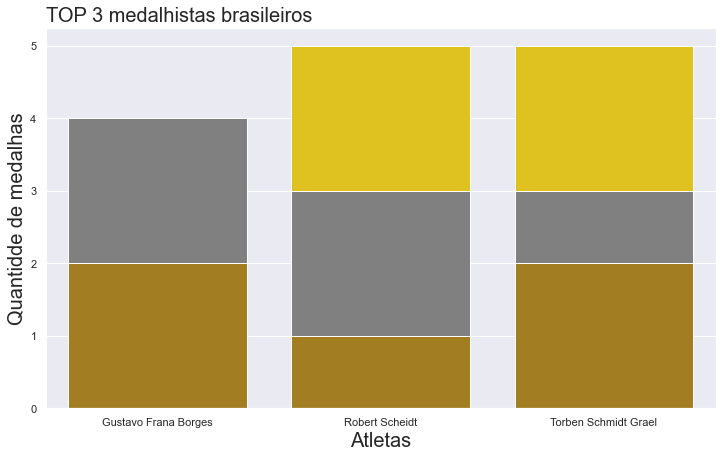

In [99]:
#Criando o gráfico de barras sobrepostas com o top 3 atletas brasileiros
plt.figure(figsize=(12,7))
sns.set_theme()

# Sobrepondo no gráfico os 3 dataframes
sns.barplot(data=df_athletes_brazil_medal_greatest, x='Name', y='Quantidade', color='gold')
sns.barplot(data=df_greatest_athlete_brazil_only_silver_bronze, x='Name', y='Quantidade', color='grey')
sns.barplot(data=df_greatest_athlete_brazil_only_bronze, x='Name', y='Quantidade', color='darkgoldenrod')

plt.yticks([0, 1, 2, 3, 4, 5]); # Alterando a escala do eixo y para facilitar a visualização

plt.xlabel('Atletas', size=20)
plt.ylabel('Quantidde de medalhas', size=20)
plt.title('TOP 3 medalhistas brasileiros', loc='left', size=20);

Agora gere o mesmo gráfico de barras empilhadas substituindo os nomes dos atletas pelo nome de todos os esportes onde o Brasil já ganhou medalhas.

**DICA:** tome muito cuidado nessa análise: cada **evento esportivo** rende 1 medalha. Por exemplo, quando a equipe de futebol vence, isso é considerado 1 medalha, mesmo tendo cerca de 20 atletas medalhistas na equipe. 

In [100]:
#Criando um dataframe com o total de medalhas por esporte
df_total_medal_sport_brazil = df_athlete_brazil_medal.drop_duplicates(subset=['City','Year','Event','Medal'])# Elimina os eventos duplicados na mesma olimpiadas.EX: Para não contabilizar as 12 medalhas do voleibol.
df_total_medal_sport_brazil = df_total_medal_sport_brazil.groupby(['Sport', 'Medal'])['Medal'].count().to_frame(name='Quantidade').reset_index()
df_total_medal_sport_brazil_total = df_total_medal_sport_brazil.groupby(['Sport'])['Quantidade'].sum().to_frame(name='Total')
df_total_medal_sport_brazil_total.reset_index(inplace=True)
df_total_medal_sport_brazil_total.head(2)


,Sport,Total
0,Athletics,16
1,Basketball,5


In [101]:
#Criando um dataframe com as medalhas prata e bronze
df_total_medal_sport_silver_bronze = df_total_medal_sport_brazil[df_total_medal_sport_brazil.Medal != 'Gold']
df_total_medal_sport_silver_bronze = df_total_medal_sport_silver_bronze.groupby(['Sport'])['Quantidade'].sum().to_frame(name='Total')
df_total_medal_sport_silver_bronze.reset_index(inplace=True)
df_total_medal_sport_silver_bronze.head(2)

,Sport,Total
0,Athletics,11
1,Basketball,5


In [102]:
#Criando um dataframe com as medalhas de bronze
df_total_medal_sport_bronze = df_total_medal_sport_brazil[df_total_medal_sport_brazil.Medal == 'Bronze']
df_total_medal_sport_bronze = df_total_medal_sport_bronze.groupby(['Sport'])['Quantidade'].sum().to_frame(name='Total')
df_total_medal_sport_bronze.reset_index(inplace=True)
df_total_medal_sport_bronze.head(2)

,Sport,Total
0,Athletics,8
1,Basketball,4


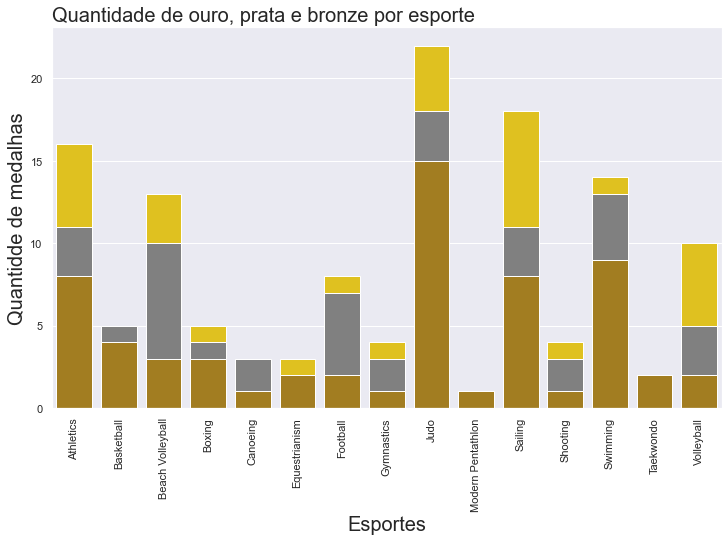

In [103]:
# Criando o gráfico de barras empilhadas para ilustrar quantidade de medalhas por esporte.
plt.figure(figsize=(12,7))

cores = {#Criando um dicionário com as cores das medalas (ouro, prata e bronze)
        'Gold': 'gold',
        'Silver': 'grey',
        'Bronze': 'darkgoldenrod',
        }
sns.barplot(data=df_total_medal_sport_brazil_total, x='Sport', y='Total', color='gold')
sns.barplot(data=df_total_medal_sport_silver_bronze, x='Sport', y='Total', color='grey')
sns.barplot(data=df_total_medal_sport_bronze, x='Sport', y='Total', color='darkgoldenrod')
plt.xticks(rotation=90)
plt.xlabel('Esportes', size=20)
plt.ylabel('Quantidde de medalhas', size=20)
plt.title('Quantidade de ouro, prata e bronze por esporte', loc='left', size=20);

Mais um gráfico de barras empilhadas: agora mostre os **eventos esportivos** que renderam medalhas para o Brasil.

Lembrando: cada "categoria" dentro de um esporte é considerado um evento. Por exemplo, dentro de "atletismo", temos uma competição de 100m masculina, uma de 100m feminino, um revezamento 4 x 100m masculino, um revezamento 4 x 100m feminino, uma competição de 400m masculino, uma de 400m feminino, uma maratona masculina, uma maratona feminina, e assim sucessivamente.

In [88]:
# Filtrando o total de medalhas por evento
df_medal_sport_brazil = df_athlete_brazil_medal.drop_duplicates(subset=['City','Year','Event','Medal'])# Elimina os eventos duplicados na mesma olimpiadas.EX: Para não contabilizar as 12 medalhas do voleibol.
df_medal_event_brazil = df_total_medal_sport_brazil.groupby(['Event', 'Medal'])['Medal'].count().to_frame(name='Quantidade').reset_index()
df_total_medal_event_brazil = df_medal_event_brazil.groupby('Event')['Quantidade'].sum().to_frame(name='Total').reset_index()
df_total_medal_event_brazil.head(2)

,Event,Total
0,Athletics Men's 200 metres,1
1,Athletics Men's 4 x 100 metres Relay,3


In [87]:
#Filtrando o total de medalhas de prata e bronze
df_medal_event_brazil_silver_bronze = df_medal_event_brazil[df_medal_event_brazil.Medal != 'Gold']
df_medal_event_brazil_silver_bronze = df_medal_event_brazil_silver_bronze.groupby('Event')['Quantidade'].sum().to_frame(name='Total').reset_index()
df_medal_event_brazil_silver_bronze.head(2)

,Event,Total
0,Athletics Men's 200 metres,1
1,Athletics Men's 4 x 100 metres Relay,3


In [73]:
# Filtrando o total de medalhas bronze
df_medal_event_brazil_bronze = df_medal_event_brazil[df_medal_event_brazil.Medal == 'Bronze']
df_medal_event_brazil_bronze = df_medal_event_brazil_bronze.groupby('Event')['Quantidade'].sum().to_frame(name='Total').reset_index()
df_medal_event_brazil_bronze.head(2)


,Event,Total
0,Athletics Men's 200 metres,1
1,Athletics Men's 4 x 100 metres Relay,2


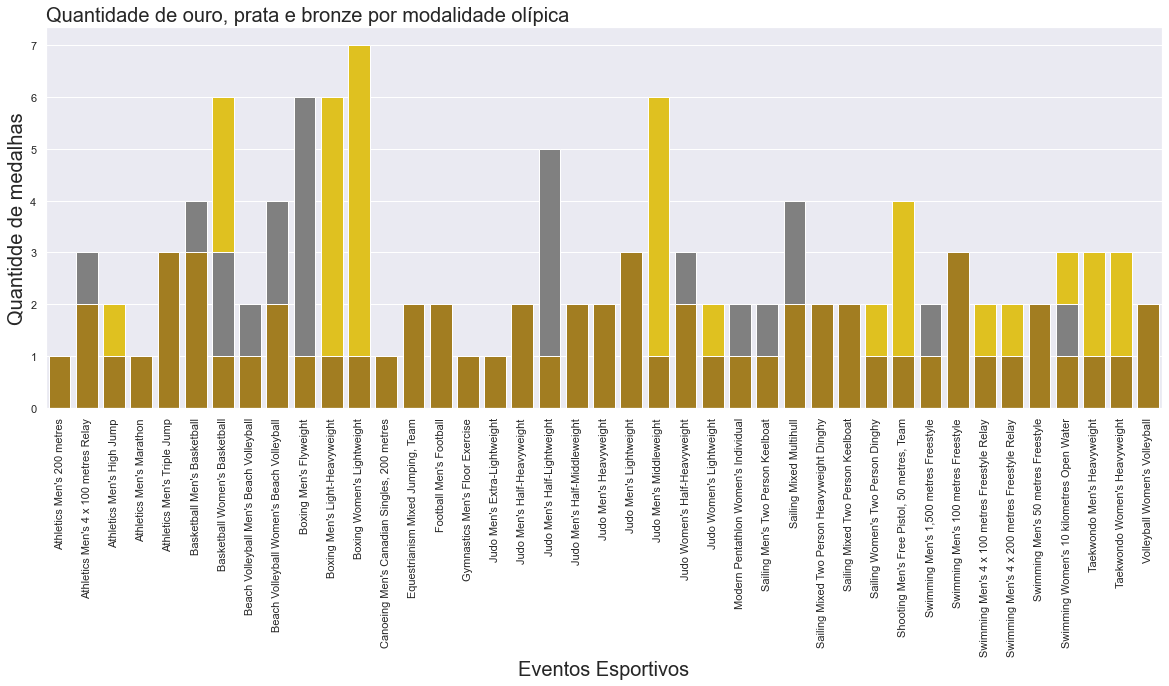

In [108]:
# Criando o gráfco de barras empilhadas para ilustrar as medalhas por modalidade olímpica
plt.figure(figsize=(20,7))

sns.barplot(data=df_total_medal_event_brazil, x='Event', y='Total', color='gold')
sns.barplot(data=df_medal_event_brazil_silver_bronze, x='Event', y='Total', color='grey')
sns.barplot(data=df_medal_event_brazil_bronze, x='Event', y='Total', color='darkgoldenrod')

plt.xticks(rotation=90)
plt.xlabel('Eventos Esportivos', size=20)
plt.ylabel('Quantidde de medalhas', size=20)
plt.title('Quantidade de ouro, prata e bronze por modalidade olípica', loc='left', size=20);

Utilize um gráfico de distribuição (como um histograma, por exemplo) ilustrando a quantidade total de medalhas do Brasil por esporte.

In [ ]:
#Filtrando o dataframe para obter as informações para criar o gráfico
df_total_medal_sport_brazil = df_athlete_brazil_medal.drop_duplicates(subset=['City','Year','Event','Medal'])# Elimina os eventos duplicados na mesma olimpiadas.EX: Para não contabilizar as 12 medalhas do voleibol.
df_total_medal_sport_brazil.head(3)

,index,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
8,1651,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver
9,1652,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver
10,1668,925,Adenzia Aparecida Ferreira da Silva,F,25.0,187.0,65.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,Gold


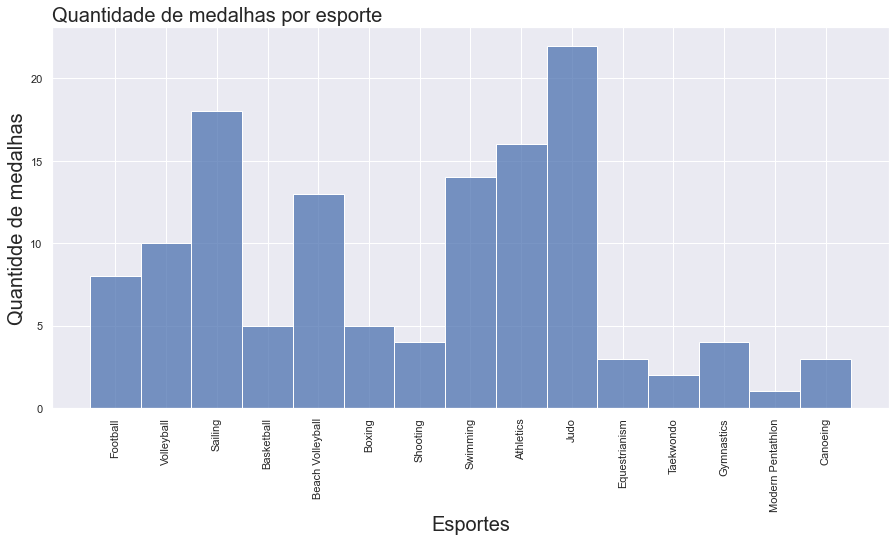

In [ ]:
#Criando o gráfico para ilustrar quantidade total de medalhas por esporte
plt.figure(figsize=(15,7))
sns.histplot(data=df_total_medal_sport_brazil, x='Sport', stat='count')
plt.xticks(rotation=90);
plt.xlabel('Esportes', size=20)
plt.ylabel('Quantidde de medalhas', size=20)
plt.title('Quantidade de medalhas por esporte', loc='left', size=20);

Repita o procedimento acima, mas com medalhas de ouro.

In [ ]:
# Filtro para obter apenas os medalhistas de ouro
df_total_medal_sport_brazil_gold = df_total_medal_sport_brazil[df_total_medal_sport_brazil.Medal == 'Gold']

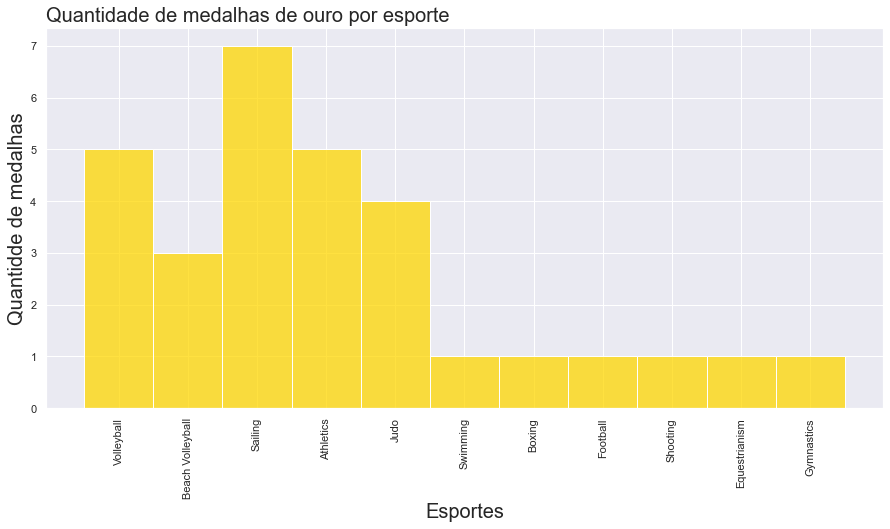

In [ ]:
# Criando o gráfico
plt.figure(figsize=(15,7))
sns.histplot(data=df_total_medal_sport_brazil_gold, x='Sport', stat='count', color='gold')
plt.xticks(rotation=90);
plt.xlabel('Esportes', size=20)
plt.ylabel('Quantidde de medalhas', size=20)
plt.title('Quantidade de medalhas de ouro por esporte', loc='left', size=20);

Agora faça um gráfico de setores (pizza) mostrando a distribuição de medalhas de ouro do Brasil por esporte.

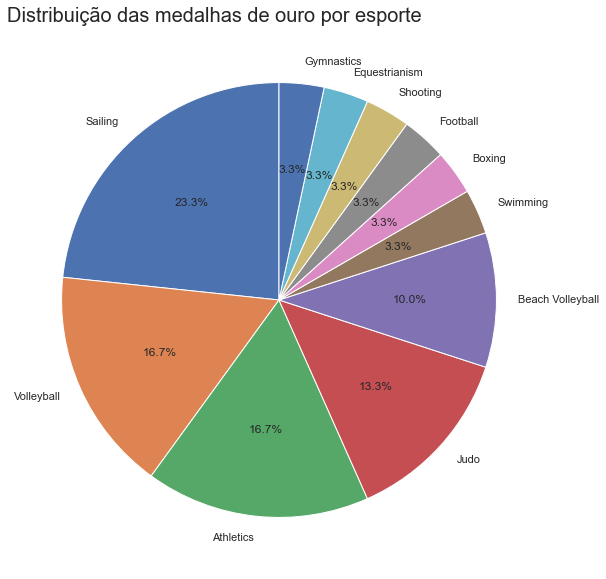

In [ ]:
# Criando o gráfico de pizza
plt.figure(figsize=(10,10))
plt.pie(df_total_medal_sport_brazil_gold['Sport'].value_counts(), 
        labels=df_total_medal_sport_brazil_gold['Sport'].value_counts().index,
        autopct='%1.1f%%', 
        startangle=90)
plt.title('Distribuição das medalhas de ouro por esporte', size=20, loc='left');


Para finalizar a história do Brasil, vamos ver a série temporal de medalhas brasileiras. Crie um gráfico de linhas contendo 3 linhas: ouro, prata e bronze. Coloque no eixo X a edição da olimpíada (em ordem cronológica) e no eixo Y o total de medalhas de cada tipo.

In [ ]:
# Filtrando para obter as informações de quantiade de medalha por edição olímpica
df_athlete_brazil_medal = df_athlete_brazil_medal.drop_duplicates(subset=['City','Year','Event','Medal'])# Elimina os eventos duplicados na mesma olimpiadas
df_total_year_brazil_medal_gold_silver_bronze = df_athlete_brazil_medal.groupby(['City', 'Year','Medal'])['Medal'].count().to_frame(name='Quantidade').reset_index()
df_total_year_brazil_medal_gold_silver_bronze.sort_values(by='Year', inplace=True)
df_total_year_brazil_medal_gold_silver_bronze.head(5)


,City,Year,Medal,Quantidade
0,Antwerpen,1920,Bronze,1
1,Antwerpen,1920,Gold,1
2,Antwerpen,1920,Silver,1
16,London,1948,Bronze,1
15,Helsinki,1952,Gold,1


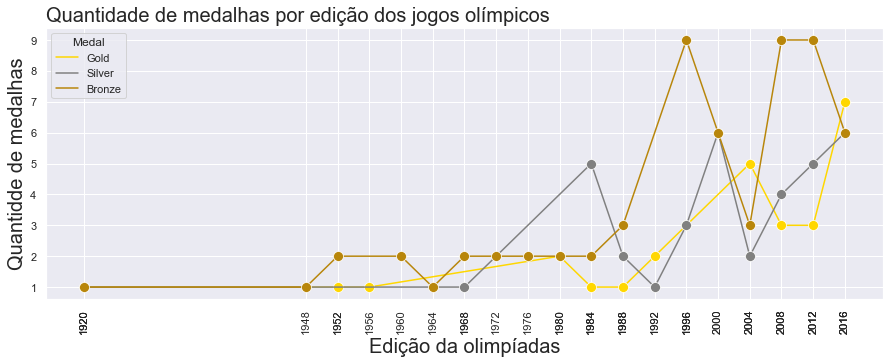

In [ ]:
# Criando o gráfico para ilustrar a quantidade de ouro, prata e bronze ao longo da história das olímpiadas
cores = {
        'Gold': 'gold',
        'Silver': 'grey',
        'Bronze': 'darkgoldenrod',
        }
plt.figure(figsize=(15,5))
sns.lineplot(data=df_total_year_brazil_medal_gold_silver_bronze, 
             x='Year', y='Quantidade', hue='Medal',hue_order=cores.keys(), palette=cores, marker='o', ms=10)
plt.xticks(df_total_year_brazil_medal_gold_silver_bronze['Year'], rotation=90);
plt.xlabel('Edição das   olimpíadas', size=20)
plt.ylabel('Quantidde de medalhas', size=20)
plt.title('Quantidade de medalhas por edição dos jogos olímpicos  ', loc='left', size=20);


## 2. O mundo nos jogos de verão

Filtre o DataFrame original para conter apenas informações sobre os **medalhistas** de todos os países **nos jogos de verão**.



In [119]:
# Filtrando apenas os atletas medalhistas da olímpiadas de verão
df_athlete_events_medal_summer = df_athlete_events[df_athlete_events.Season == 'Summer']
df_athlete_events_medal_summer = df_athlete_events_medal_summer.dropna(subset=['Medal'])
df_athlete_events_medal_summer.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze


Utilizando subplots, crie 2 boxplots ilustrando a quantidade de medalhas por atleta. Em um deles, considere todos os atletas. No segundo, experimente remover os *outliers*.

Descubra o total de medalhas de ouro de cada país (lembrando-se da restrição dos eventos esportivos, para não contabilizar múltiplas medalhas em esportes de equipe!).

Agora pegue os 10 países com mais medalhas e crie uma categoria "Outros" para o restante dos países. Exiba um gráfico de pizza mostrando a distribuição de medalhas de ouro entre essas 11 "equipes".

Repita o procedimento acima, mas mostrando o total de medalhas ao invés de apenas medalhas de ouro.

Crie um gráfico de barras empilhadas, com cada país das categorias acima no eixo X, total de medalhas no eixo Y, e barras empilhadas representando as medalhas de ouro, prata e bronze de cada país.

Crie um gráfico de distribuição (por exemplo, um histograma) mostrando a quantidade total de medalhas por país.

**Desafio bônus:** Crie uma visualização da quantidade de medalhas de ouro e outra para quantidade total de medalhas por país, ambas utilizando mapas. Utilize o tipo de mapa que achar mais adequado.

## 3. Brasil vs Mundo

Faça um gráfico de barras comparando os maiores medalhistas brasileiros com os maiores medalhistas do mundo em suas respectivas categorias.

Represente o esporte no eixo X, a quantidade de medalhas no eixo Y, coloque barras lado-a-lado representando os diferentes atletas de uma mesma modalidade e empilhe as medalhas de ouro, prata e bronze de cada atleta.

Repita o procedimento acima, mas ao invés de atletas, considere o(s) esporte(s) onde o Brasil mais possui medalha comparando-os com o país com maior quantidade de medalhas naquele esporte.

Para finalizar, repita os gráficos que você gerou com os 10 países com mais medalhas, mas remova o Brasil da categoria "Outros" e mostre-o também no gráfico.